# Unit 5 - Financial Planning

In [34]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
# import json

%matplotlib inline

In [35]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [36]:
# Set current amount of crypto assets
holding_data = {
    "coins": [1.2, 5.3],
}

# Set the crypto asset names
crypto_asets = ["BTC", "ETH"]

# Creates the crypto DF
holding_df = pd.DataFrame(holding_data, index=crypto_asets)

# Display crypto Df
holding_df

,coins
BTC,1.2
ETH,5.3


In [37]:
# Crypto API URLs
"""
Dont think I used these. 
"""
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [38]:
# Initializes the alpaca api object
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [39]:
# Fetches the Crypto Prices with the Alpaca API
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes 
start_date = pd.Timestamp("2022-10-29", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-10-30", tz="America/New_York").isoformat()

crypto_tickers = ["BTCUSD", "ETHUSD"]

current_crypto_price = alpaca.get_crypto_bars(
    crypto_tickers,
    timeframe=timeframe,
    start=start_date,
    end=end_date
).df

# Fetch current BTC and ETH price
BTCUSD_price = current_crypto_price.values[0][4]    
ETHUSD_price = current_crypto_price.values[3][4]    

# Current holdings
my_btc = 1.2
my_eth = 5.3

# Compute current value of my crpto
my_btc_value = my_btc * BTCUSD_price
my_eth_value = my_eth * ETHUSD_price

# Prints current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24900.80
The current value of your 5.3 ETH is $8579.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [45]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

# Create the Alpaca API object
# YOUR CODE HERE!

In [49]:
# Format current date as ISO format
# YOUR CODE HERE!
stock_start_date = pd.Timestamp("2022-10-28", tz="America/New_York").isoformat()
stock_end_date = pd.Timestamp("2022-10-28", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
stock_prices = alpaca.get_bars(
    tickers,
    timeframe=timeframe,
    start=stock_start_date,
    end=stock_end_date
).df

# Reorganize the DataFrame
# Set the indedx to the stock symbol
stock_prices.set_index('symbol', inplace=True)

#Remove all columns except for closing price
stock_prices.drop(columns=["open", "high", "low", "volume", "trade_count", "vwap"], inplace=True)

# Concatenate the ticker DataFrames
# all_assets_df = pd.concat([holding_df, sto])

# Preview DataFrame
stock_prices.head()

,close
symbol,
AGG,95.22
SPY,389.02


In [50]:
# Select AGG and SPY close prices
agg_close_price = stock_prices.loc["AGG"]["close"]
spy_close_price = stock_prices.loc["SPY"]["close"]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.22
Current SPY closing price: $389.02


In [52]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# # Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19451.00
The current value of your 200 AGG shares is $19044.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Sum assets amounts into a dictionary
asset_amoutns = {
    "amount": [my_btc_value + my_eth_value, my_agg_value + my_spy_value]
}

# Set asset class names
asset_classes = ["crypto", "shares"]

# Creates the savings DataFrame
df_savings = pd.DataFrame(asset_amoutns, index=asset_classes)

# Displays the savings DataFrame
display(df_savings)

,amount
crypto,33480.391
shares,38495.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

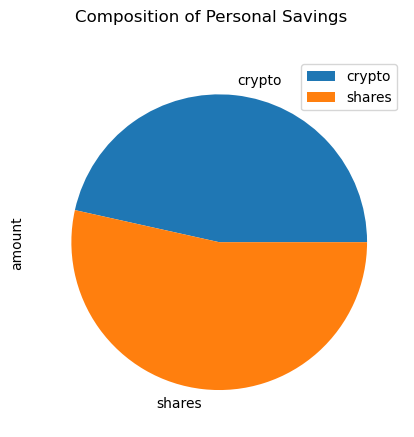

In [17]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True, title="Composition of Personal Savings")

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()

# Validate saving health
if total_savings["amount"] >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("We recommend you ramp up your savings. You do not have enough money for an emergecy fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
mcs_start_date = pd.Timestamp('2017-10-29', tz='America/New_York').isoformat()
mcs_end_date = pd.Timestamp('2022-10-28', tz='America/New_York').isoformat()

In [20]:

# Set timeframe to "1Day"
timeframe = "1Day"

# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=mcs_start_date,
    end=mcs_end_date,
).df

# Display sample data
df_stock_data.head()


# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

df_stock_data.head()
# Display sample data
# df_stock_data.head()


AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2017-10-30 04:00:00+00:00  109.43  109.560  109.360  109.54  2385203   
2017-10-31 04:00:00+00:00  109.52  109.550  109.440  109.47  3719883   
2017-11-01 04:00:00+00:00  109.17  109.410  109.170  109.29  2959362   
2017-11-02 04:00:00+00:00  109.35  109.495  109.331  109.35  2160492   
2017-11-03 04:00:00+00:00  109.48  109.480  109.290  109.45  1781239   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2017-10-30 04:00:00+00:00        9719  109.487234  257.07  257.60  256.410   
2017-10-31 04:00:00+00:00       10450  109.488193  257.18  257.44  256.805   
2017-11-01 04:00:00+00:00       11591  109.302138  258.04  258.43  257.070   
2017-11-02 04:00:00+00:00        8877  109.381316  257.41  257.75  256.190   
2017-11-03 04:00:00+00:00        9453  109.415086  257.77  258.50  257.300   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-10-30 04:00:00+00:00  256.80  54882217      178943  257.065476  
2017-10-31 04:00:00+00:00  257.12  60678916      162728  257.164535  
2017-11-01 04:00:00+00:00  257.50  54263336      193085  257.717880  
2017-11-02 04:00:00+00:00  257.62  56449535      217328  257.251675  
2017-11-03 04:00:00+00:00  258.45  62908639      189765  258.119308

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.5, 0.5],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [22]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2017-10-30 04:00:00+00:00  109.43  109.560  109.360  109.54  2385203   
2017-10-31 04:00:00+00:00  109.52  109.550  109.440  109.47  3719883   
2017-11-01 04:00:00+00:00  109.17  109.410  109.170  109.29  2959362   
2017-11-02 04:00:00+00:00  109.35  109.495  109.331  109.35  2160492   
2017-11-03 04:00:00+00:00  109.48  109.480  109.290  109.45  1781239   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-10-30 04:00:00+00:00        9719  109.487234          NaN  257.07   
2017-10-31 04:00:00+00:00       10450  109.488193    -0.000639  257.18   
2017-11-01 04:00:00+00:00       11591  109.302138    -0.001644  258.04   
2017-11-02 04:00:00+00:00        8877  109.381316     0.000549  257.41   
2017-11-03 04:00:00+00:00        9453  109.415086     0.000914  257.77   

                                                                          \
                             high      low   close    volume trade_count   
timestamp                                                                  
2017-10-30 04:00:00+00:00  257.60  256.410  256.80  54882217      178943   
2017-10-31 04:00:00+00:00  257.44  256.805  257.12  60678916      162728   
2017-11-01 04:00:00+00:00  258.43  257.070  257.50  54263336      193085   
2017-11-02 04:00:00+00:00  257.75  256.190  257.62  56449535      217328   
2017-11-03 04:00:00+00:00  258.50  257.300  258.45  62908639      189765   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-10-30 04:00:00+00:00  257.065476          NaN  
2017-10-31 04:00:00+00:00  257.164535     0.001246  
2017-11-01 04:00:00+00:00  257.717880     0.001478  
2017-11-02 04:00:00+00:00  257.251675     0.000466  
2017-11-03 04:00:00+00:00  258.119308     0.003222

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\benei\FinTech\APIs-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005534,0.994577,1.002417,1.005229,0.999185,0.995757,1.003070,0.996722,1.001259,1.015393,...,1.004339,0.990516,1.003242,1.001053,0.996901,0.997121,1.001730,1.008475,1.001172,1.005488
2,0.999652,0.995540,0.992562,1.006428,0.989461,0.997232,1.021843,1.004773,1.004705,1.019458,...,1.007460,0.986863,1.009954,0.996206,0.998964,0.997963,1.000980,1.005870,0.996075,1.013253
3,1.000639,0.996619,1.003770,1.004911,0.993788,1.006047,1.020858,1.009423,1.005593,1.020309,...,1.008570,0.988220,1.013202,0.995196,1.001280,1.000357,1.003645,1.005740,0.989105,1.012335
4,0.986741,0.995944,1.009219,1.002262,0.986993,1.005876,1.023636,1.007137,1.022194,1.029421,...,1.007206,0.988248,1.015292,0.994344,1.011655,0.988262,1.003265,0.990533,0.990563,1.008604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.326920,2.692489,5.167171,1.055261,3.505709,3.246805,4.335645,1.795215,3.915245,1.617411,...,1.574696,4.182361,2.245007,1.227098,2.651200,6.730686,2.251579,2.978425,1.387687,2.262873
7557,1.327403,2.699753,5.208027,1.052279,3.483437,3.213372,4.377524,1.791745,3.939695,1.610819,...,1.582456,4.188621,2.252065,1.225726,2.634708,6.753668,2.254383,2.969906,1.400133,2.288119
7558,1.318191,2.750716,5.205567,1.053782,3.499857,3.174255,4.408478,1.787048,3.999554,1.620348,...,1.581245,4.172751,2.263446,1.235400,2.626899,6.711061,2.245267,2.969638,1.395669,2.295626
7559,1.329045,2.751964,5.201359,1.041558,3.470808,3.178006,4.450095,1.798648,3.995273,1.610493,...,1.576224,4.221355,2.260834,1.229165,2.606595,6.713149,2.256514,2.943432,1.406490,2.279121


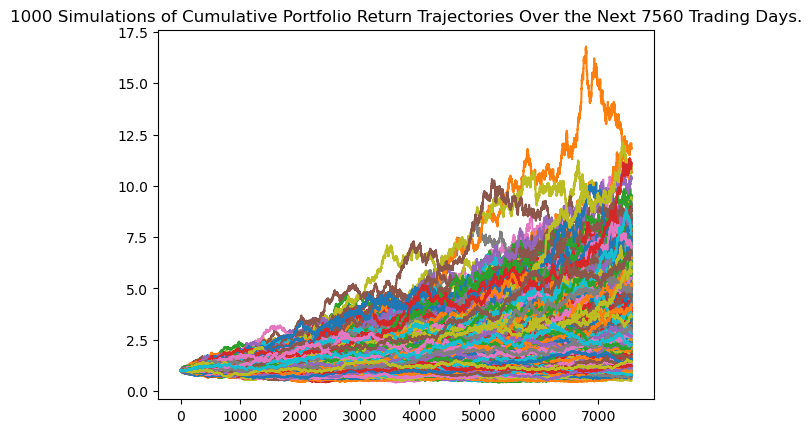

In [24]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()


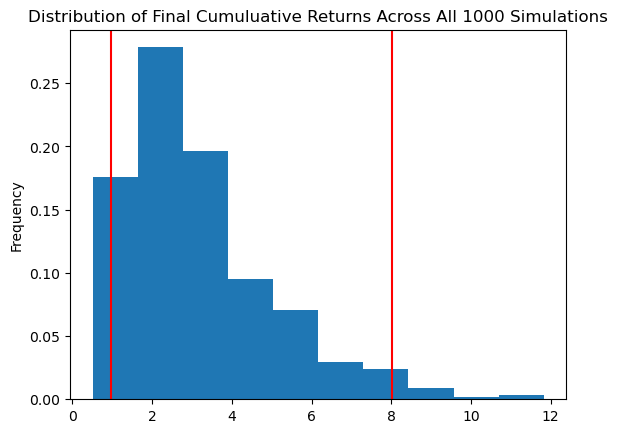

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()


### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
mcs_summary = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
mcs_summary

count           1000.000000
mean               3.164379
std                1.860063
min                0.514092
25%                1.805377
50%                2.707483
75%                4.024993
max               11.825971
95% CI Lower       0.966613
95% CI Upper       8.025048
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mcs_summary[8]*initial_investment,2)
ci_upper = round(mcs_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19332.25 and $160500.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mcs_summary[8]*initial_investment,2)
ci_upper = round(mcs_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28998.38 and $240751.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")